In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append("/dat/matterhorn/akolle/dev/scripts/python")

In [3]:
import site
reload(site)

<module 'site' from '/dat/matterhorn/env27/lib/python2.7/site.pyc'>

In [4]:
cd /dat/matterhorn5/production/library/slrl_test_v20200518/TM_SLRL_R.0_GMSTAT1/basesignals/B1

/dat/matterhorn5/production/library/slrl_test_v20200518/TM_SLRL_R.0_GMSTAT1/basesignals/B1


In [5]:
import slrl_spread_statistics
slrl_spread_statistics.calc_and_plot_spread("dates2013jan","/dat/matterhorn5/production/library/slrl_test_v20200518/TM_SLRL_R.0_GMSTAT1/basesignals/B1","/dat/matterhorn5/production/library/slrl_test_v20200518/TM_SLRL_R.0_GMSTAT1/basesignals/B1/basesignalhist","True",10)

[]
[]
['XCME.ZN.0']
['XCME.ZN.0']
remove_sym: []
engine stime etime: 09:00:00 18:59:59
XCME.ZN.0 : 0.628
active_date: 20130102
XCME.ZN.0 : 0.628
active_date: 20130103
XCME.ZN.0 : 0.624
active_date: 20130104
XCME.ZN.0 : 0.622
active_date: 20130107
XCME.ZN.0 : 0.624
active_date: 20130108
XCME.ZN.0 : 0.624
active_date: 20130109
XCME.ZN.0 : 0.622
active_date: 20130110
2013-01-10 08:00:00 : 17.6021281907
2013-01-10 08:01:00 : 14.5763882827
2013-01-10 08:02:00 : 10.8667007907
XCME.ZN.0 : 0.617
XCME.ZN.0 : 0.614
active_date: 20130114
XCME.ZN.0 : 0.614
active_date: 20130115
XCME.ZN.0 : 0.616
active_date: 20130116
XCME.ZN.0 : 0.619
active_date: 20130117
XCME.ZN.0 : 0.618
active_date: 20130118
XCME.ZN.0 : 0.598
active_date: 20130121
XCME.ZN.0 : 0.605
active_date: 20130122
XCME.ZN.0 : 0.617
active_date: 20130123
2013-01-23 08:00:00 : 18.405485366
2013-01-23 08:01:00 : 11.6117607167
XCME.ZN.0 : 0.616
active_date: 20130124
XCME.ZN.0 : 0.614
active_date: 20130125
XCME.ZN.0 : 0.608
active_date: 20130

In [44]:
import griddata_util
df,dfcor=griddata_util.generate_All_Correlations_for_segment("20190101","20200214","08:00:00","21:30",14400,5,"5Min")
X= [(val['mean'],val['std']) for idx,val in (dfcor.describe()).iteritems() if abs(val['mean'])> 0.5]


loading data
SPREAD: ('XLIF.Z.0', 'XLIF.R.0')
SPREAD: ('XLIF.I.2', 'XLIF.L.2')
SPREAD: ('XLIF.I.4', 'XLIF.L.4')
SPREAD: ('XLIF.I.6', 'XLIF.L.6')
SPREAD: ('XCME.GE.2', 'XLIF.I.2')
SPREAD: ('XCME.GE.3', 'XLIF.I.3')
SPREAD: ('XCME.GE.4', 'XLIF.I.4')
SPREAD: ('XCME.GE.5', 'XLIF.I.5')
SPREAD: ('XCME.GE.6', 'XLIF.I.6')
SPREAD: ('XCME.GE.7', 'XLIF.I.7')
SPREAD: ('XCME.GE.8', 'XLIF.I.8')
SPREAD: ('XCME.GE.9', 'XLIF.I.9')
SPREAD: ('XCME.GE.10', 'XLIF.I.10')
SPREAD: ('XCME.GE.2', 'XLIF.L.2')
SPREAD: ('XCME.GE.3', 'XLIF.L.3')
SPREAD: ('XCME.GE.4', 'XLIF.L.4')
SPREAD: ('XCME.GE.5', 'XLIF.L.5')
SPREAD: ('XCME.GE.6', 'XLIF.L.6')
SPREAD: ('XCME.GE.8', 'XLIF.L.8')
SPREAD: ('XLIF.I.2', 'XTMX.BAX.2')
SPREAD: ('XLIF.I.4', 'XTMX.BAX.4')
SPREAD: ('XCME.GE.2', 'XTMX.BAX.2')
SPREAD: ('XCME.GE.3', 'XTMX.BAX.3')
SPREAD: ('XCME.GE.4', 'XTMX.BAX.4')
SPREAD: ('XCME.GE.5', 'XTMX.BAX.5')
SPREAD: ('XCME.ZN.0', 'XTMX.CGB.0')
SPREAD: ('XCME.ZF.0', 'XTMX.CGB.0')
SPREAD: ('XLIF.Z.0', 'XLIF.L.4')
SPREAD: ('XLIF.Z.0', 'XL

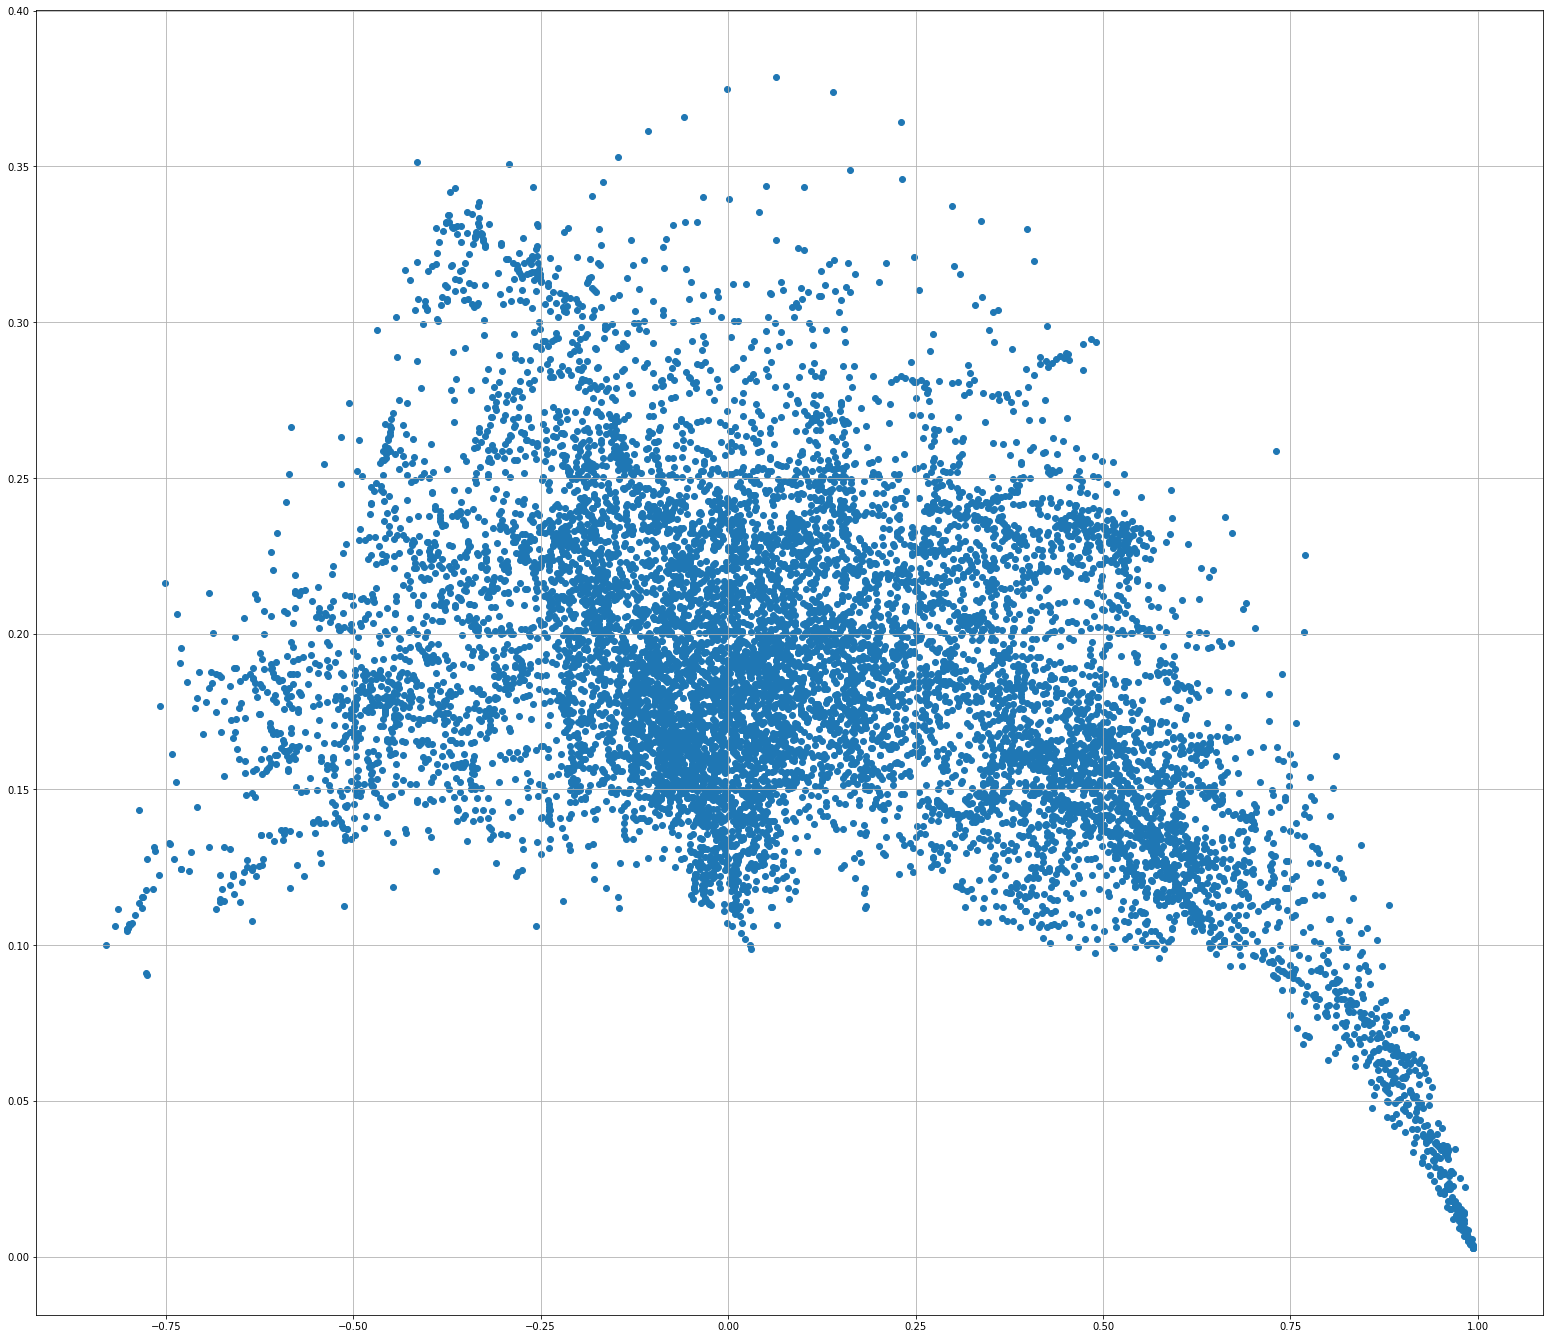

In [10]:
import matplotlib.pyplot as plt
plt.scatter(dfcor.mean().values,dfcor.std().values)
plt.grid()

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
normmean=dfcor.mean().mean()
normmeanstd=dfcor.mean().std()
normstd=dfcor.std().mean()
normstdstd=dfcor.std().std()
normkurtosis=dfcor.kurtosis().mean()
normkurtosisstd=dfcor.kurtosis().std()
X2=[[(dfcor[idx].mean()- normmean)/normmeanstd,(dfcor[idx].std()-normstd)/normstdstd,(dfcor[idx].kurtosis()-normkurtosis)/normkurtosisstd] for idx,val in dfcor.iteritems()]
X=[[(dfcor[idx].mean()- normmean)/normmeanstd,(dfcor[idx].std()-normstd)/normstdstd] for idx,val in dfcor.iteritems()]
distX=euclidean_distances(X, [X[4978]])


In [12]:
Xnames=[idx for idx,val in dfcor.iteritems()]
Xnames.index("XLIF.R.0_XEUR.FGBL.0")

ValueError: 'XLIF.R.0_XEUR.FGBL.0' is not in list

In [ ]:
Xnames[distX.argmin()]
distdict={Xnames[idx]:distX[idx] for idx,val in enumerate(distX)}



In [51]:
idx=0
for name,elem in dfcor.iteritems():
    idx+=1
    val=elem.describe()
    if ("XTMX.CGB." in name):
        if abs(val['mean']) < 0.9 and abs(val['mean']) > 0.7 and len(set(name.replace("<->","_").split("_")))==2:    
            print str(idx)+" "+name.replace("__","<->")+" "+str("{0:.2f}".format(val['mean']))+" "+str("{0:.2f}".format(val['std']))


451 XCME.6C.0<->XTMX.CGB.0_XCME.6C.0 -0.81 0.11
1667 XCME.GE.10<->XTMX.CGB.0 0.74 0.09
1852 XCME.GE.11<->XTMX.CGB.0 0.74 0.09
1976 XCME.GE.12<->XTMX.CGB.0 0.74 0.09
2099 XCME.GE.13<->XTMX.CGB.0 0.75 0.09
2221 XCME.GE.14<->XTMX.CGB.0 0.75 0.09
2342 XCME.GE.15<->XTMX.CGB.0 0.75 0.09
2462 XCME.GE.16<->XTMX.CGB.0 0.76 0.09
3537 XCME.GE.5<->XTMX.CGB.0 0.70 0.10
3836 XCME.GE.6<->XTMX.CGB.0 0.71 0.10
4084 XCME.GE.7<->XTMX.CGB.0 0.72 0.09
4275 XCME.GE.8<->XTMX.CGB.0 0.73 0.09
4518 XCME.GE.9<->XTMX.CGB.0 0.73 0.09
5177 XCME.ZB.0<->XTMX.CGB.0 0.78 0.09
5365 XCME.ZF.0<->XTMX.CGB.0 0.75 0.09
5598 XCME.ZN.0<->XTMX.CGB.0 0.78 0.08
10901 XTMX.CGB.0<->XTMX.BAX.3 0.75 0.09
10902 XTMX.CGB.0<->XTMX.BAX.4 0.78 0.08
10903 XTMX.CGB.0<->XTMX.BAX.5 0.80 0.08
10904 XTMX.CGB.0<->XTMX.CGB.0_XCME.6C.0 0.82 0.09
11026 XTMX.SXF.0<->XTMX.CGB.0_XTMX.SXF.0 -0.76 0.13
